<a href="https://colab.research.google.com/github/luispmorera/TP_Morera_Luis_Data_Science/blob/main/PROYECTO_FINAL_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree


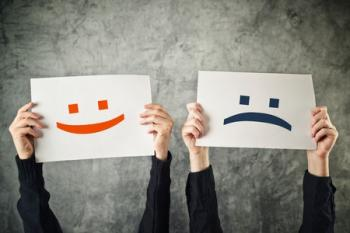



Contenido
Las puntuaciones y clasificaciones de la felicidad utilizan datos de la Encuesta Mundial de Gallup. Las columnas que siguen a la estimación de la puntuación de la felicidad indican hasta qué punto cada uno de seis factores – producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad – contribuyen a hacer que las evaluaciones de vida sean más altas en cada país que en Distopía, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. Estos factores no tienen impacto en la puntuación total reportada para cada país, pero sí explican por qué algunos países se clasifican más alto que otros.

En este trabajo trataré de explorar y comprender cuáles son las variables que mas peso tienen en la percepción de bienestar subjetivo (felicidad).

Contexto:
El informe de felicidad mundial es una investigación global que evalúa el bienestar subjetivo y otros factores socioeconómicos que influyen en la felicidad de los individuos en diferentes países. Los datos incluyen una variedad de indicadores como el PIB per cápita, la esperanza de vida saludable, el apoyo social, la libertad para tomar decisiones, la generosidad, la percepción de corrupción, y los afectos positivos y negativos.

Audiencia:

Investigadores y académicos: Interesados en estudiar las correlaciones y causaciones entre diversos factores económicos, sociales y de salud con la felicidad.
Políticos y legisladores: Buscan datos y análisis para diseñar políticas que mejoren la calidad de vida y el bienestar de sus ciudadanos.
Organizaciones no gubernamentales (ONGs) y agencias internacionales: Utilizan estos datos para focalizar sus programas y esfuerzos en áreas que necesitan mejora.
Empresas y economistas: Analizan cómo factores de bienestar pueden influir en la productividad y el desarrollo económico.
Ciudadanos interesados: Personas que desean entender qué factores influyen en la felicidad y el bienestar en su país y en otros.

Hipótesis y Preguntas de Interés

Hipótesis:

Hipótesis 1: Existe una correlación significativa entre el PIB per cápita y el nivel de felicidad de los países.
Hipótesis 2: La percepción de corrupción tiene un impacto negativo significativo en el bienestar subjetivo de los individuos.
Hipótesis 3: El apoyo social y la libertad para tomar decisiones son factores determinantes más importantes para la felicidad que los ingresos económicos.

Preguntas de Interés:

¿Qué factores económicos y sociales tienen la mayor influencia en la felicidad de los países?
¿Cómo varía la percepción de felicidad entre países con diferentes niveles de desarrollo económico?
¿Qué rol juegan el apoyo social y la libertad personal en la felicidad subjetiva de los individuos?
¿Existe una relación entre la percepción de corrupción y los niveles de felicidad en diferentes países?
¿Hay diferencias significativas en los índices de felicidad entre diferentes continentes o regiones?

Posibles Limitaciones

Datos Faltantes o Incompletos: Algunos países pueden tener datos incompletos o faltantes para ciertos años o indicadores, lo que puede afectar la robustez del análisis.
Sesgo en la Encuesta: Las respuestas de los encuestados pueden estar sujetas a sesgos culturales o personales, lo que puede influir en la precisión de las medidas de felicidad subjetiva.
Medición de Variables: Las diferencias en la metodología de recolección de datos entre diferentes fuentes (Gallup World Poll, Banco Mundial, OMS) pueden llevar a inconsistencias.
Causalidad vs. Correlación: Identificar relaciones causales directas entre variables puede ser desafiante; la correlación entre variables no implica necesariamente causalidad.
Cambio en Indicadores: Los indicadores y las preguntas de encuesta pueden haber cambiado ligeramente a lo largo de los años, lo que podría afectar la comparabilidad temporal de los datos.
Representatividad de la Muestra: La representatividad de la muestra puede variar entre países, especialmente en aquellos con conflictos o inestabilidad política.
Influencias Externas: Factores externos no considerados en el análisis (como eventos globales, pandemias, desastres naturales) pueden influir en los niveles de felicidad y no estar reflejados en los datos.

In [5]:
df=pd.read_csv("/content/drive/MyDrive/world-happiness-report-2021.csv")


In [6]:
df.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


from matplotlib import pyplot as plt
_df_0['Ladder score'].plot(kind='hist', bins=20, title='Ladder score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Standard error of ladder score'].plot(kind='hist', bins=20, title='Standard error of ladder score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['upperwhisker'].plot(kind='hist', bins=20, title='upperwhisker')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['lowerwhisker'].plot(kind='hist', bins=20, title='lowerwhisker')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Country name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Ladder score', y='Standard error of ladder score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Standard error of ladder score', y='upperwhisker', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='upperwhisker', y='lowerwhisker', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='lowerwhisker', y='Logged GDP per capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ladder score in Dystopia']
  ys = series['Ladder score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Ladder score in Dystopia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ladder score in Dystopia')
_ = plt.ylabel('Ladder score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ladder score in Dystopia']
  ys = series['Standard error of ladder score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Ladder score in Dystopia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ladder score in Dystopia')
_ = plt.ylabel('Standard error of ladder score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ladder score in Dystopia']
  ys = series['upperwhisker']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Ladder score in Dystopia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ladder score in Dystopia')
_ = plt.ylabel('upperwhisker')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ladder score in Dystopia']
  ys = series['lowerwhisker']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Ladder score in Dystopia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ladder score in Dystopia')
_ = plt.ylabel('lowerwhisker')

from matplotlib import pyplot as plt
_df_13['Ladder score'].plot(kind='line', figsize=(8, 4), title='Ladder score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Standard error of ladder score'].plot(kind='line', figsize=(8, 4), title='Standard error of ladder score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['upperwhisker'].plot(kind='line', figsize=(8, 4), title='upperwhisker')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['lowerwhisker'].plot(kind='line', figsize=(8, 4), title='lowerwhisker')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Country name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Ladder score', y='Country name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Country name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Standard error of ladder score', y='Country name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Country name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='upperwhisker', y='Country name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Country name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='lowerwhisker', y='Country name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

INFORMACIÓN BÁSICA ACERCA DEL DATAFRAME

Fuentes de datos y definiciones de variables:

-Puntuación de felicidad o bienestar subjetivo (nombre de la variable: ladder):

La medida de bienestar subjetivo proviene de la Encuesta Mundial de Gallup (GWP) publicada el 26 de febrero de 2021, cubriendo los años 2005 a 2020.
Se basa en la respuesta promedio nacional a la pregunta de evaluaciones de vida: "Por favor, imagine una escalera con peldaños numerados del 0 en la parte inferior al 10 en la parte superior. La parte superior de la escalera representa la mejor vida posible para usted y la parte inferior representa la peor vida posible. ¿En qué peldaño de la escalera diría que se encuentra en este momento?"
También se conoce como la "escalera de la vida de Cantril".

-PIB per cápita (nombre de la variable: gdp):

Basado en la paridad de poder adquisitivo (PPA) a precios constantes de 2017 dólares internacionales, según la actualización del 14 de octubre de 2020 de los Indicadores de Desarrollo Mundial (WDI).

-Esperanza de vida saludable (HLE):

Basada en datos de la Organización Mundial de la Salud (OMS) del repositorio de datos del Observatorio Mundial de la Salud, actualizados el 28 de septiembre de 2020.
Incluye datos para los años 2000, 2005, 2010, 2015 y 2016, interpolados y extrapolados para el período de la muestra (2005-2020).

-Apoyo social:

Promedio nacional de respuestas binarias (0 o 1) a la pregunta: "Si tuviera problemas, ¿tiene familiares o amigos en quienes pueda confiar para que le ayuden cuando los necesite?"

-Libertad para tomar decisiones de vida:

Promedio nacional de respuestas a la pregunta: "¿Está satisfecho o insatisfecho con su libertad para elegir lo que hace con su vida?"

-Generosidad:

Residual de la regresión del promedio nacional de respuestas a la pregunta: "¿Ha donado dinero a una organización benéfica en el último mes?" en el PIB per cápita.

-Percepción de corrupción:

Promedio nacional de respuestas a dos preguntas: "¿Es la corrupción generalizada en el gobierno?" y "¿Es la corrupción generalizada en las empresas?".
Se usa la percepción de corrupción en empresas si falta la de gobierno.

-Índice de Gini del ingreso de los hogares:

Basado en los datos de la Encuesta Mundial de Gallup y el Banco Mundial, el índice de Gini mide la desigualdad de ingresos dentro de un país.
Estas variables se utilizan para analizar y comparar el bienestar subjetivo y otros factores que influyen en la felicidad a nivel nacional.




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [8]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


LIMPIEZA DE DATOS

In [9]:
raw_data = df.copy() # Punto de control


In [10]:
# Valores omitidos

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Conteo", "Porcentaje"])
print("Cantidad de valores perdidos y porcentaje: ")
print(null_summary)

Cantidad de valores perdidos y porcentaje: 
                                            Conteo  Porcentaje
Country name                                     0         0.0
Regional indicator                               0         0.0
Explained by: Perceptions of corruption          0         0.0
Explained by: Generosity                         0         0.0
Explained by: Freedom to make life choices       0         0.0
Explained by: Healthy life expectancy            0         0.0
Explained by: Social support                     0         0.0
Explained by: Log GDP per capita                 0         0.0
Ladder score in Dystopia                         0         0.0
Perceptions of corruption                        0         0.0
Generosity                                       0         0.0
Freedom to make life choices                     0         0.0
Healthy life expectancy                          0         0.0
Social support                                   0         0.0
Logged GDP 

In [11]:
print(df.isnull().sum())
#me aseguro de no tener datos perdidos


Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


In [12]:
for col in df.columns:
    print(col, end= ': ')
    print(df[col].unique())
    #no se observan valores atípicos para ninguna de las variables todos los datos se encuentran en rangos esperables

Country name: ['Finland' 'Denmark' 'Switzerland' 'Iceland' 'Netherlands' 'Norway'
 'Sweden' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Israel'
 'Germany' 'Canada' 'Ireland' 'Costa Rica' 'United Kingdom'
 'Czech Republic' 'United States' 'Belgium' 'France' 'Bahrain' 'Malta'
 'Taiwan Province of China' 'United Arab Emirates' 'Saudi Arabia' 'Spain'
 'Italy' 'Slovenia' 'Guatemala' 'Uruguay' 'Singapore' 'Kosovo' 'Slovakia'
 'Brazil' 'Mexico' 'Jamaica' 'Lithuania' 'Cyprus' 'Estonia' 'Panama'
 'Uzbekistan' 'Chile' 'Poland' 'Kazakhstan' 'Romania' 'Kuwait' 'Serbia'
 'El Salvador' 'Mauritius' 'Latvia' 'Colombia' 'Hungary' 'Thailand'
 'Nicaragua' 'Japan' 'Argentina' 'Portugal' 'Honduras' 'Croatia'
 'Philippines' 'South Korea' 'Peru' 'Bosnia and Herzegovina' 'Moldova'
 'Ecuador' 'Kyrgyzstan' 'Greece' 'Bolivia' 'Mongolia' 'Paraguay'
 'Montenegro' 'Dominican Republic' 'North Cyprus' 'Belarus' 'Russia'
 'Hong Kong S.A.R. of China' 'Tajikistan' 'Vietnam' 'Libya' 'Malaysia'
 'Indonesia' 'Congo (

ANALISIS EXPLORATORIO DE DATOS (EDA)

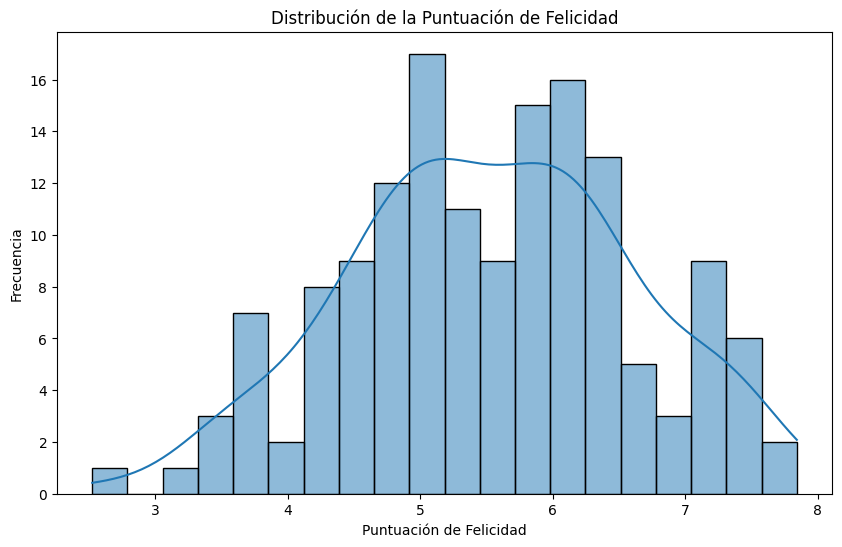

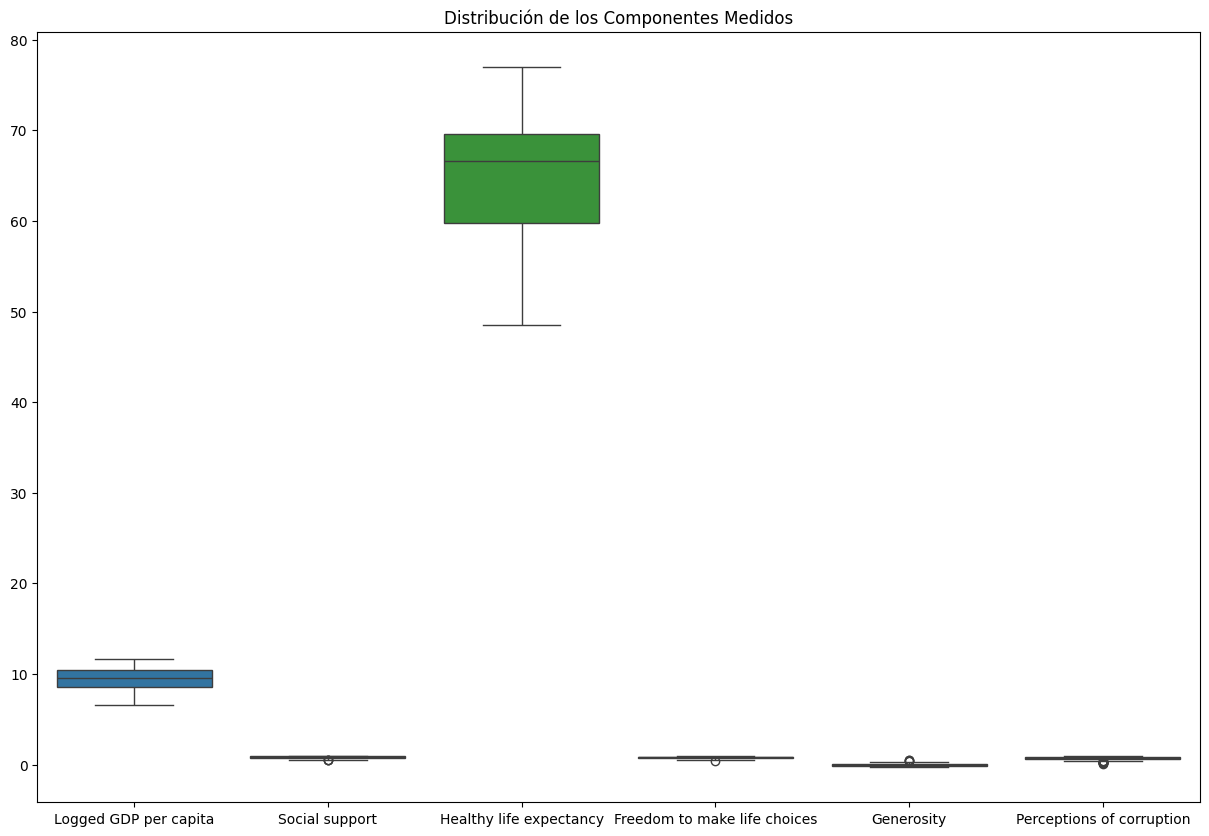

In [13]:

# Histograma de la puntuación de felicidad
plt.figure(figsize=(10, 6))
sns.histplot(df['Ladder score'], bins=20, kde=True)
plt.title('Distribución de la Puntuación de Felicidad')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de los componentes medidos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])
plt.title('Distribución de los Componentes Medidos')
plt.show()


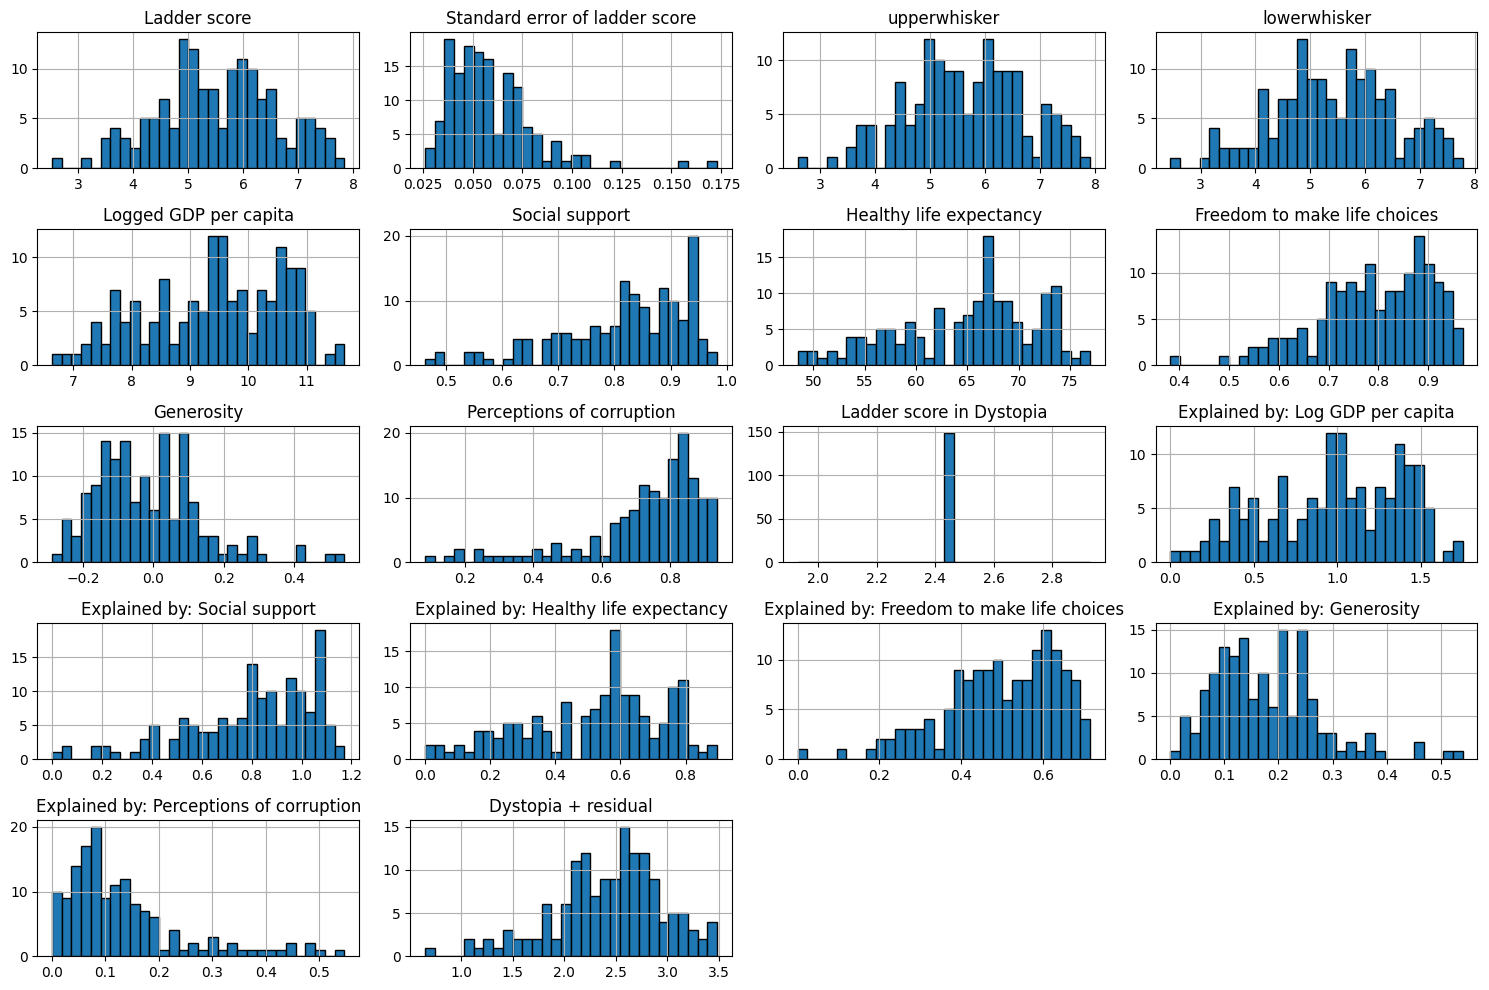

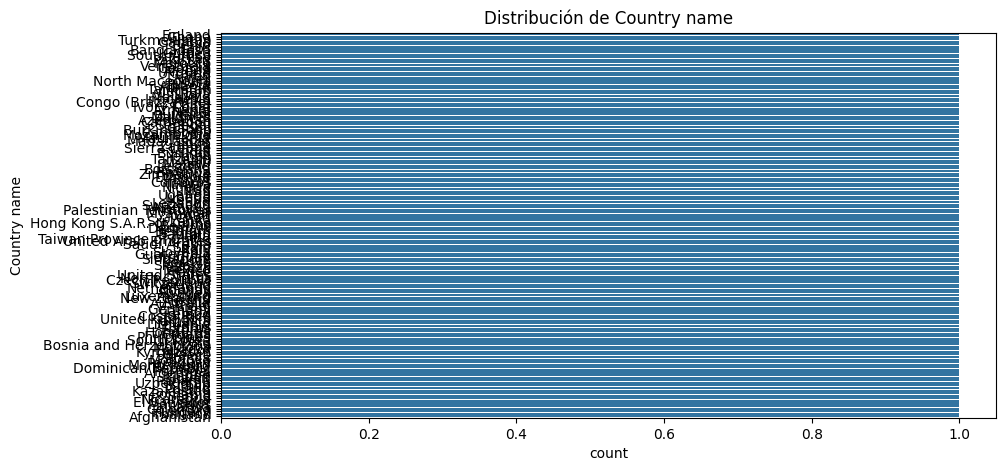

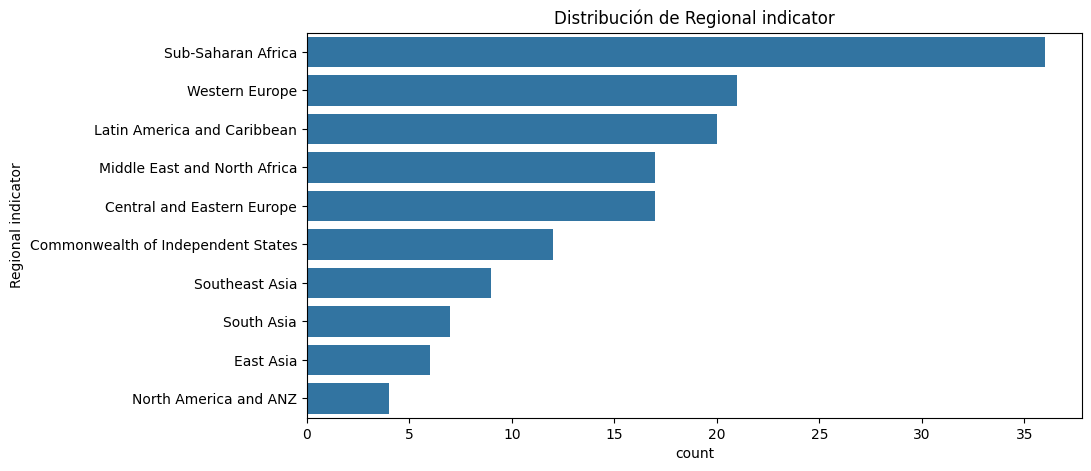

In [14]:
# Distribución de variables numéricas
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Distribución de variables categóricas
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.show()


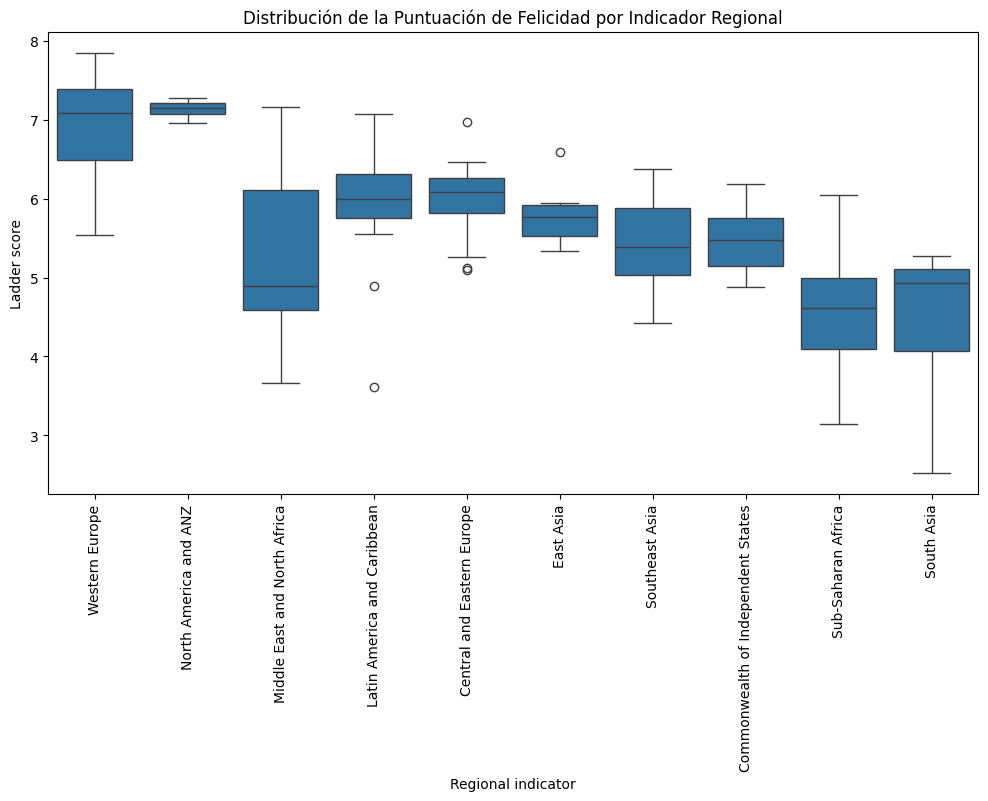

In [15]:
# Boxplot de la puntuación de felicidad por indicador regional
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Regional indicator', y='Ladder score')
plt.title('Distribución de la Puntuación de Felicidad por Indicador Regional')
plt.xticks(rotation=90)
plt.show()


<ipython-input-16-d3a364579b06>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

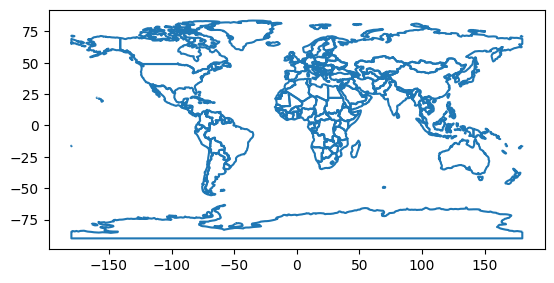

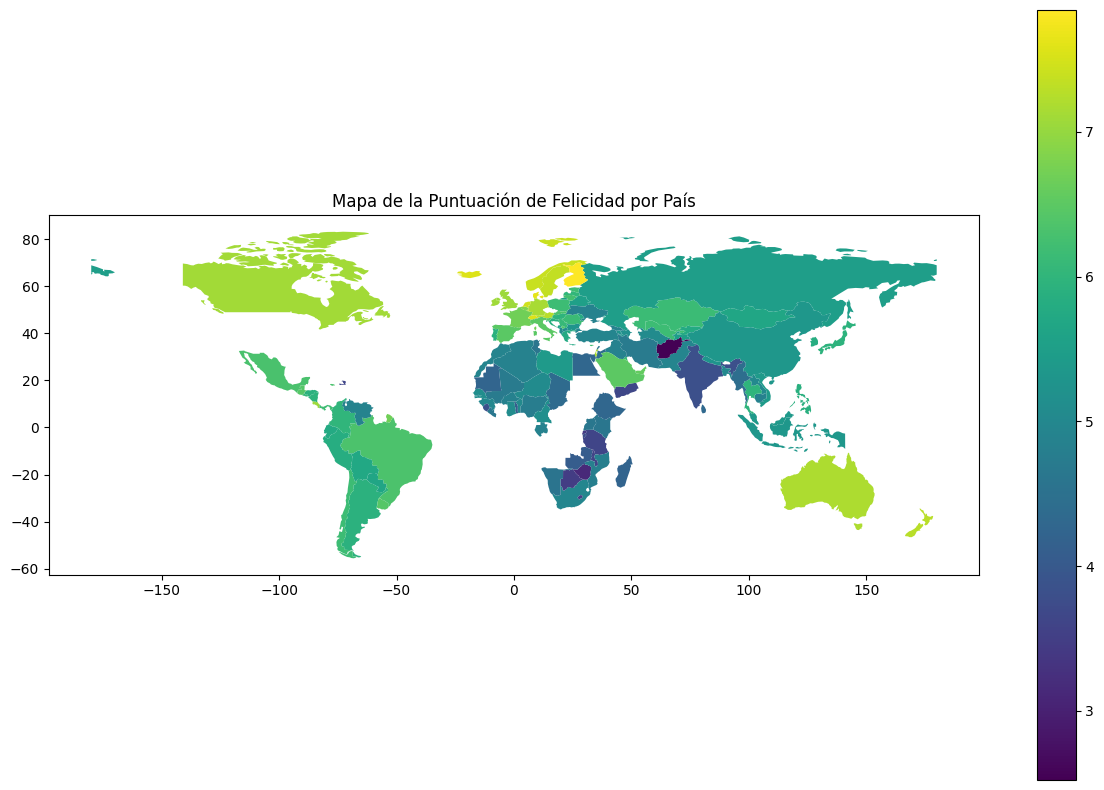

In [16]:
import geopandas as gpd

# Leer un shapefile del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unir los datos de felicidad con los datos geográficos
world = world.merge(df, how="left", left_on="name", right_on="Country name")

# Plotear el mapa
plt.figure(figsize=(15, 10))
world.boundary.plot()
world.plot(column='Ladder score', cmap='viridis', legend=True, figsize=(15, 10))
plt.title('Mapa de la Puntuación de Felicidad por País')
plt.show()


In [17]:
# Calcular los cuartiles
quartiles = df['Ladder score'].quantile([0.25, 0.5, 0.75])

print(quartiles)


0.25    4.852
0.50    5.534
0.75    6.255
Name: Ladder score, dtype: float64


In [18]:
# Función para clasificar los países en cuartiles
def classify_quartile(score, quartiles):
    if score <= quartiles[0.25]:
        return 'Q1 (Least Happy)'
    elif score <= quartiles[0.5]:
        return 'Q2'
    elif score <= quartiles[0.75]:
        return 'Q3'
    else:
        return 'Q4 (Most Happy)'

# Aplicar la función a cada puntuación de felicidad
df['Quartile'] = df['Ladder score'].apply(lambda x: classify_quartile(x, quartiles))

# Mostrar las primeras filas del DataFrame actualizado
df.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Quartile
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Q4 (Most Happy)
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,Q4 (Most Happy)
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,Q4 (Most Happy)
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,Q4 (Most Happy)
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,Q4 (Most Happy)


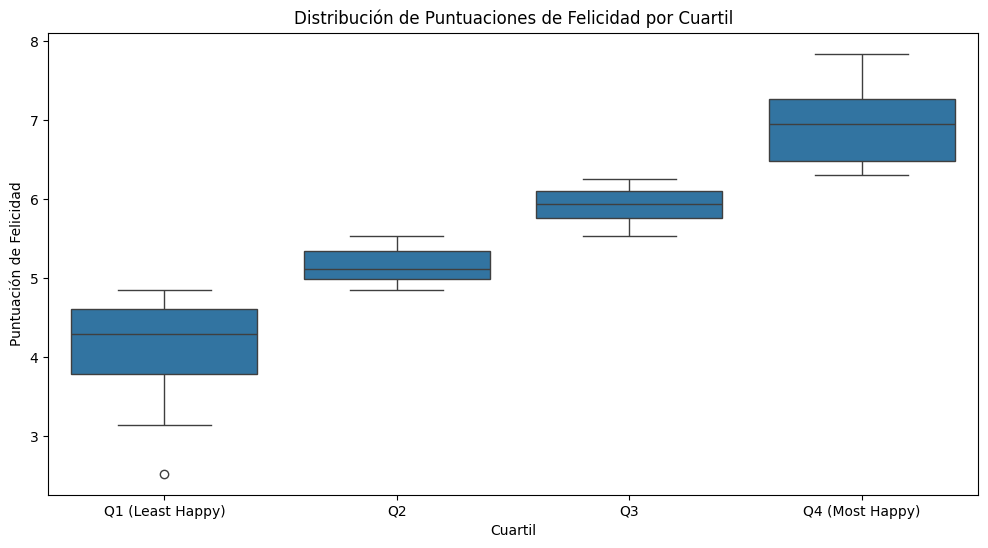

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot de puntuaciones de felicidad por cuartil
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Quartile', y='Ladder score', order=['Q1 (Least Happy)', 'Q2', 'Q3', 'Q4 (Most Happy)'])
plt.title('Distribución de Puntuaciones de Felicidad por Cuartil')
plt.xlabel('Cuartil')
plt.ylabel('Puntuación de Felicidad')
plt.show()


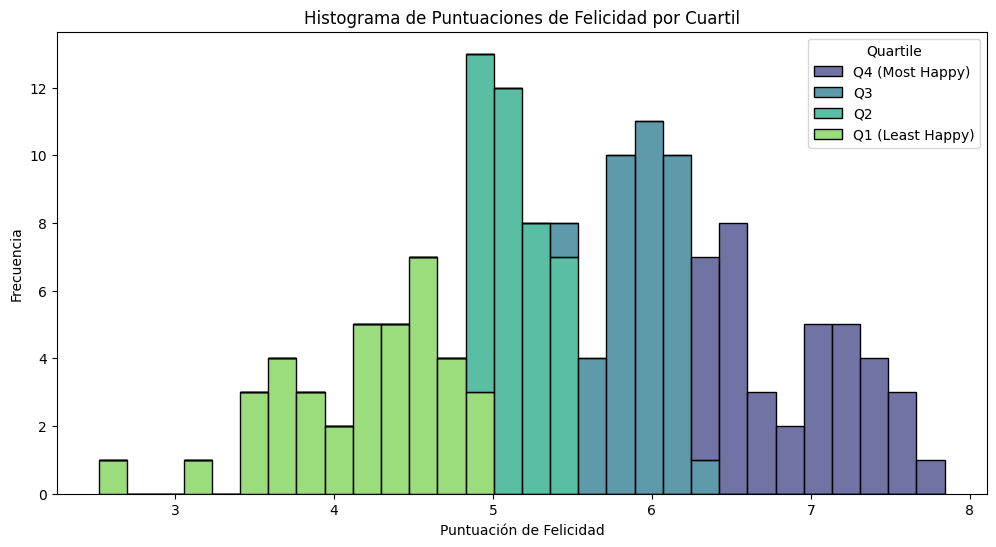

In [20]:
# Histograma de puntuaciones de felicidad por cuartil
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Ladder score', hue='Quartile', multiple='stack', bins=30, palette='viridis')
plt.title('Histograma de Puntuaciones de Felicidad por Cuartil')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Frecuencia')
plt.show()


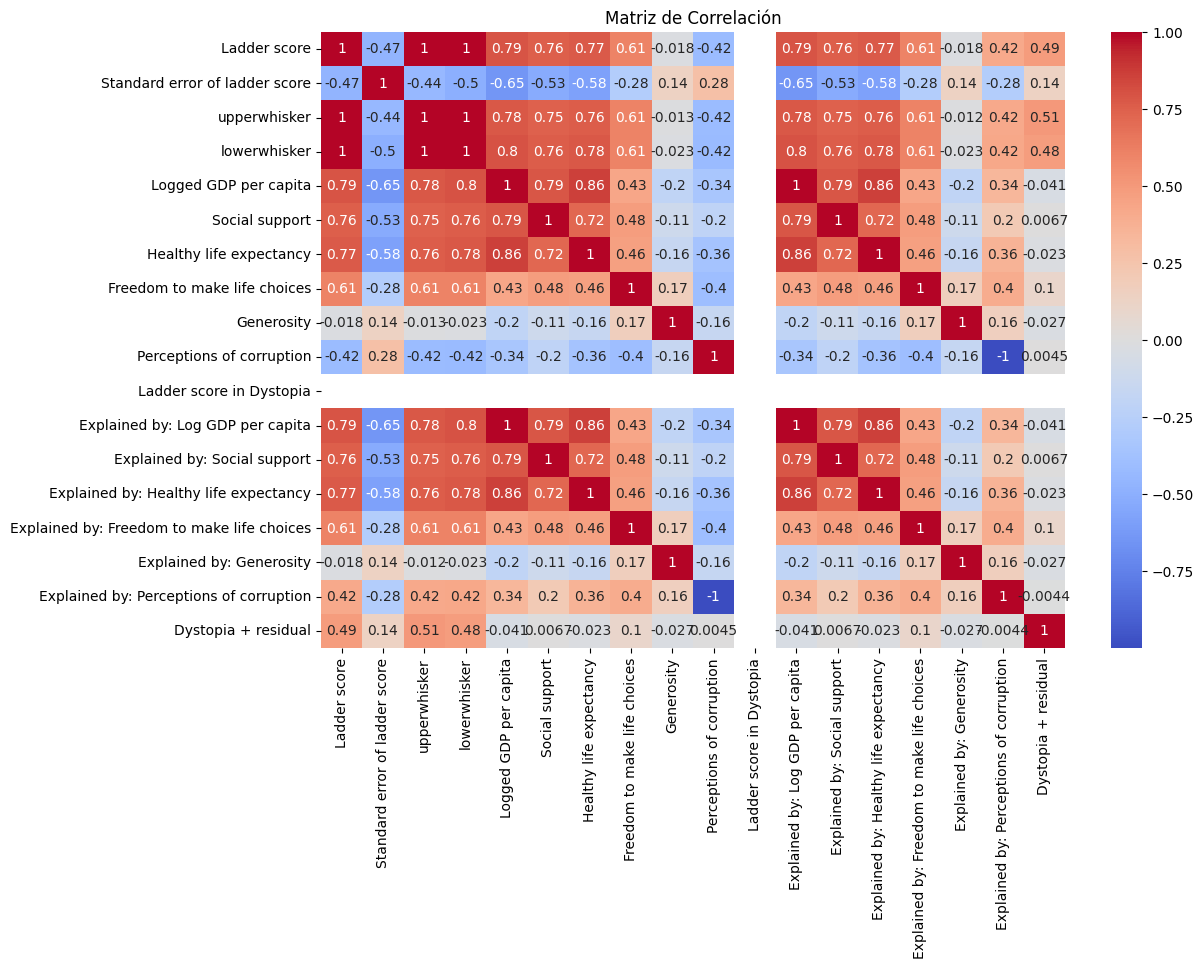

In [21]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [22]:
import statsmodels.api as sm

# Verificar los tipos de datos
print(df.dtypes)

# Seleccionar las columnas numéricas para el modelado
X = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']

# Comprobar si hay valores nulos
print(X.isnull().sum())
print(y.isnull().sum())

# Eliminar filas con valores nulos si es necesario
X = X.dropna()
y = y.dropna()

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

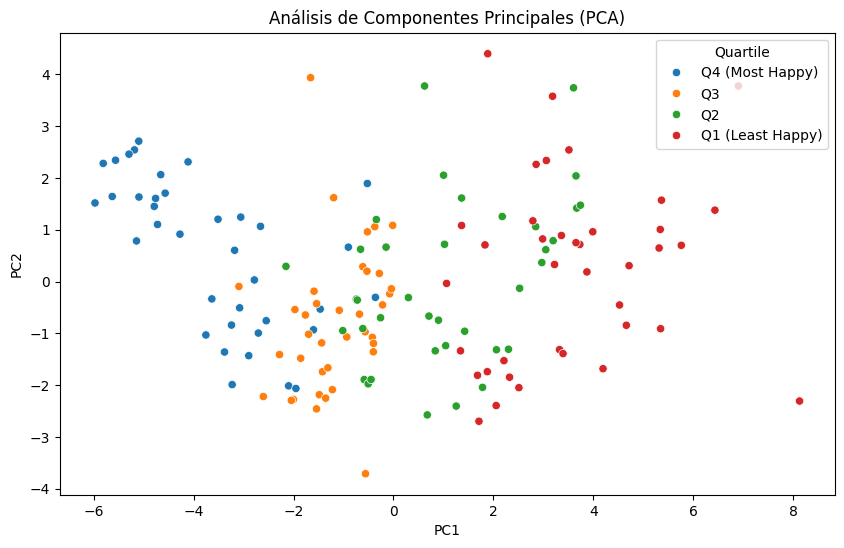

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Realizar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convertir a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas de cuartiles
pca_df['Quartile'] = df['Quartile']

# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Quartile', data=pca_df)
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()



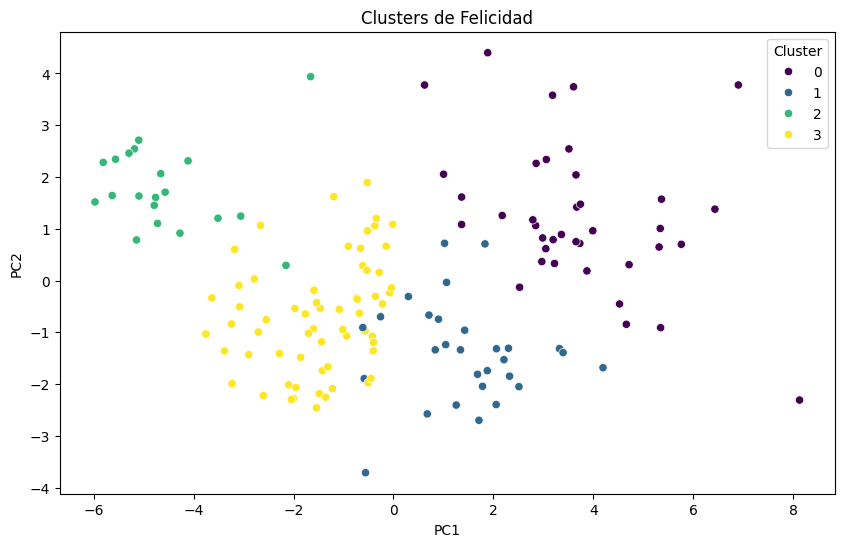

In [24]:
from sklearn.cluster import KMeans

# Realizar K-means
kmeans = KMeans(n_clusters=4, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Añadir las etiquetas de clusters al DataFrame original
df['Cluster'] = clusters

# Añadir las etiquetas de clusters al DataFrame de PCA
pca_df['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters de Felicidad')
plt.show()



In [25]:
import pandas as pd

# Crear un DataFrame con las cargas de los componentes principales
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.select_dtypes(include=['float64', 'int64']).columns)

print(pca_loadings)


                                                 PC1       PC2
Ladder score                               -0.310066  0.052284
Standard error of ladder score              0.208162  0.123020
upperwhisker                               -0.307309  0.058227
lowerwhisker                               -0.312324  0.046482
Logged GDP per capita                      -0.300819 -0.145326
Social support                             -0.282313 -0.112846
Healthy life expectancy                    -0.295221 -0.107564
Freedom to make life choices               -0.219521  0.263584
Generosity                                  0.028169  0.523182
Perceptions of corruption                   0.162683 -0.310375
Ladder score in Dystopia                    0.000000 -0.000000
Explained by: Log GDP per capita           -0.300815 -0.145302
Explained by: Social support               -0.282315 -0.112740
Explained by: Healthy life expectancy      -0.295225 -0.107635
Explained by: Freedom to make life choices -0.219517  0

Conclusiones del Trabajo
1. Impacto de las Variables en la Felicidad

Los resultados del análisis de regresión OLS indican que las variables Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, y Perceptions of corruption tienen un impacto significativo en el puntaje de felicidad (Ladder score). Esto confirma varias hipótesis sobre los factores que influyen en el bienestar subjetivo:

PIB per Cápita (Logged GDP per capita): Cada incremento en el PIB per cápita logarítmico está asociado con un aumento en el puntaje de felicidad. Este resultado es consistente con la hipótesis de que una mayor riqueza económica contribuye positivamente al bienestar general.

Apoyo Social (Social support): La variable de apoyo social muestra un efecto positivo significativo en el puntaje de felicidad. Esto refuerza la hipótesis de que tener redes de apoyo es crucial para el bienestar, sugiriendo que el soporte social puede actuar como un buffer frente a las adversidades.

Esperanza de Vida Saludable (Healthy life expectancy): Aunque el efecto es positivo, es relativamente pequeño en comparación con el apoyo social y el PIB. Esto sugiere que, aunque la salud es importante, su impacto sobre la felicidad puede ser menor cuando se compara con otros factores como el apoyo social.

Libertad para Tomar Decisiones de Vida (Freedom to make life choices): La libertad de tomar decisiones está positivamente relacionada con la felicidad, lo cual respalda la hipótesis de que la autonomía y el control sobre la vida personal contribuyen significativamente al bienestar.

Percepción de Corrupción (Perceptions of corruption): Un aumento en la percepción de corrupción se asocia con una disminución en el puntaje de felicidad. Este hallazgo es coherente con la idea de que la corrupción y la falta de transparencia en el gobierno afectan negativamente la percepción de bienestar de los ciudadanos.

Generosidad (Generosity): La generosidad no mostró un efecto significativo en el puntaje de felicidad en este análisis. Esto podría indicar que la generosidad, aunque valiosa, no tiene un impacto tan fuerte como las otras variables en el bienestar general.

2. Relevancia de las Componentes Principales

El análisis de Componentes Principales (PCA) revela que las principales variables que explican la variabilidad en los datos de felicidad son las mismas que las que muestran un impacto significativo en el análisis de regresión. Esto valida la elección de las variables y su relevancia para el modelo de felicidad.

3. Limitaciones y Consideraciones

Multicolinealidad: La presencia de un alto número de condición en el modelo sugiere que puede haber multicolinealidad entre las variables independientes. Esto puede afectar la precisión de los coeficientes estimados y la interpretación de su impacto individual.

Datos Agregados: Los datos provienen de encuestas nacionales y pueden no capturar variaciones a nivel individual o local que podrían influir en el bienestar subjetivo. Además, los datos de ciertas variables, como la esperanza de vida saludable, se interpolaron para ajustar el período de análisis, lo que introduce una posible imprecisión.

Generosidad y Otros Factores: La falta de significancia en la variable de generosidad sugiere que podrían existir otros factores no incluidos en el análisis que también afectan la felicidad. Futuras investigaciones podrían explorar estos factores adicionales.

4. Implicaciones Prácticas

Los resultados sugieren que las políticas destinadas a mejorar el PIB per cápita, el apoyo social, la esperanza de vida saludable, la libertad de tomar decisiones y la reducción de la corrupción podrían tener un impacto positivo en la felicidad de los ciudadanos. Específicamente, fortalecer las redes de apoyo social y garantizar una mayor transparencia en el gobierno pueden ser estrategias efectivas para mejorar el bienestar general.